#Perform Exploratory Data Analysis

install required libraries

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install seaborn

# Upload the datasets
- Customer
- Product
- Transaction

In [3]:
#customer.csv
data_file_customer = 'Customers.csv'

#product.csv
data_file_product = 'Products.csv'

#transaction.csv
data_file_transaction = 'Transactions.csv'

## Data Preparation and Cleaning
- Load the file using Pandas
- Look at some information about the data & the columns
- Fix any missing or incorrect values

In [4]:
import pandas as pd

In [5]:
#read customer.csv
customer_data = pd.read_csv(data_file_customer)

#read product.csv
product_data = pd.read_csv(data_file_product)

#read transaction.csv
transaction_data = pd.read_csv(data_file_transaction)

In [6]:
customer_data

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


# to get information about the dataset

In [7]:
#to get only the columns of specific data
product_data.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [8]:
#to view the first five elements and also the last five elements use tail
print(product_data.tail())

   ProductID             ProductName     Category   Price
95      P096    SoundWave Headphones  Electronics  307.47
96      P097      BookWorld Cookbook        Books  319.34
97      P098        SoundWave Laptop  Electronics  299.93
98      P099  SoundWave Mystery Book        Books  354.29
99      P100       HomeSense Sweater     Clothing  126.34


In [9]:
#overview of dataset
transaction_data.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [10]:
# to inspect columns and data types
print(customer_data.info())
print(product_data.info())
print(transaction_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

## Data cleaning

In [11]:
#Handle Missing values

#to view number of missing values present the customer_data
print(customer_data.isnull().sum())
print("\n")

#to view number of missing values present the product_data
print(product_data.isnull().sum())
print("\n")

#to view number of missing values present the transaction_data
print(transaction_data.isnull().sum())
print("\n")

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64




In [12]:
#Check for Duplicates
print(customer_data.duplicated().sum())
print(product_data.duplicated().sum())
print(transaction_data.duplicated().sum())

0
0
0


In [15]:
merged_df = transaction_data.merge(customer_data, on="CustomerID", how="left").merge(product_data, on="ProductID", how="left")
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


# Insights

In [29]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
yearly_sales = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('Y'))['Quantity'].sum()
yearly_sales.reset_index()

,TransactionDate,Quantity
0,2023,12
1,2024,2525


In [53]:
# Count unique customers in each region
customer_count_by_region = merged_df.groupby('Region')['CustomerID'].nunique()

# Print the customer counts by region
print("Number of Customers by Region:")
print(customer_count_by_region)


Number of Customers by Region:
Region
Asia             44
Europe           50
North America    46
South America    59
Name: CustomerID, dtype: int64


In [35]:
# Replace 'CategoryName' with the specific category you want to filter
category_name = 'Books'

# Filter for the specific category
specific_category_df = merged_df[merged_df['Category'] == category_name]

# Find the number of unique customers in the filtered data
unique_customers = specific_category_df['CustomerID'].nunique()

print(f"Number of unique customers who purchased in category '{category_name}': {unique_customers}")


Number of unique customers who purchased in category 'Books': 154


In [32]:
print(merged_df.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', ' TransactionDate'],
      dtype='object')


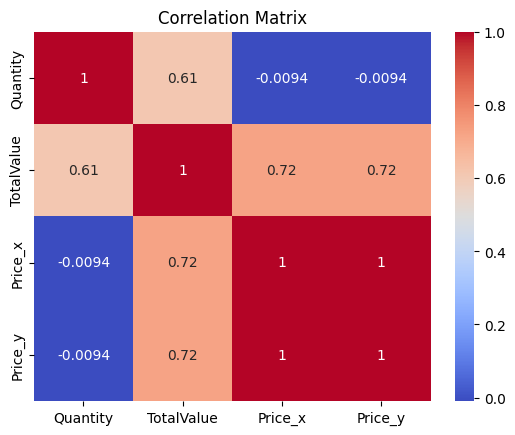

In [43]:
# Select only numeric columns
corr_matrix = merged_df.select_dtypes(include='number').corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [49]:
# Calculate transaction revenue based on Quantity and TotalValue
merged_df['transaction_revenue'] = merged_df['Quantity'] * merged_df['TotalValue']

# Count total customers and repeat customers
total_customers = merged_df['CustomerID'].nunique()

# Get the unique CustomerIDs who have made more than one purchase
repeat_customers = merged_df[merged_df.duplicated(subset='CustomerID', keep=False)]['CustomerID'].nunique()

# Calculate the percentage of repeat customers
repeat_customer_percentage = (repeat_customers / total_customers) * 100

# Calculate the revenue from repeat customers
repeat_customer_ids = merged_df[merged_df.duplicated(subset='CustomerID', keep=False)]['CustomerID']
revenue_from_repeat_customers = merged_df[merged_df['CustomerID'].isin(repeat_customer_ids)]['transaction_revenue'].sum()

# Calculate total revenue
total_revenue = merged_df['transaction_revenue'].sum()

# Calculate the percentage of revenue from repeat customers
repeat_revenue_percentage = (revenue_from_repeat_customers / total_revenue) * 100

# Print the results
print(f"Repeat Customers: {repeat_customer_percentage:.2f}%")
print(f"Revenue from Repeat Customers: {repeat_revenue_percentage:.2f}%")


Repeat Customers: 93.97%
Revenue from Repeat Customers: 99.21%


Category Revenue Contribution:
Category
Books          27.944490
Electronics    25.371021
Clothing       24.581780
Home Decor     22.102710
Name: transaction_revenue, dtype: float64


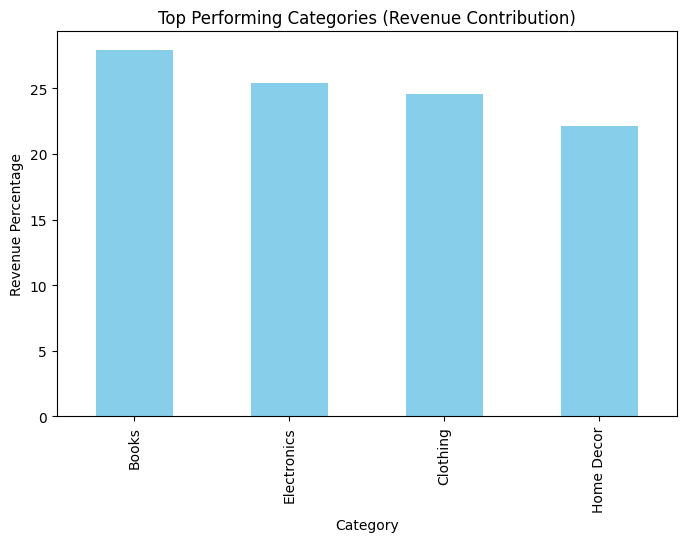

In [52]:
# Calculate the revenue for each transaction
merged_df['transaction_revenue'] = merged_df['Quantity'] * merged_df['TotalValue']

# Group by category and calculate the sum of revenues
category_revenue = merged_df.groupby('Category')['transaction_revenue'].sum().sort_values(ascending=False)

# Calculate total revenue (this should already be calculated if you have 'transaction_revenue')
total_revenue = merged_df['transaction_revenue'].sum()

# Calculate percentage contribution of each category
category_revenue_percentage = (category_revenue / total_revenue) * 100

print("Category Revenue Contribution:")
print(category_revenue_percentage)

# Optional: Visualize as a bar chart
import matplotlib.pyplot as plt

category_revenue_percentage.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Top Performing Categories (Revenue Contribution)")
plt.xlabel("Category")
plt.ylabel("Revenue Percentage")
plt.show()
